# Data Analysis - Restaurant's Tips Data
In one restaurant, a food server recorded the following data on all cus-
tomers they served during an interval of two and a half months in early 1990.
The restaurant, located in a suburban shopping mall, was part of a national
chain and served a varied menu. In observance of local law, the restaurant
offered to seat in a non-smoking section to patrons who requested it. Each
record includes a day and time, and taken together, they show the server’s
work schedule.

In [3]:
import pandas as pd
import seaborn as sns

In [4]:
tips = sns.load_dataset('tips')

#  > Look at the first few rows to understand Data

In [5]:
tips.head(10)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


# Q: How many weekdays are present in the Dataset

# > Look at last few rows

In [7]:
tips.tail(10)

,total_bill,tip,sex,smoker,day,time,size
234,15.53,3.00,Male,Yes,Sat,Dinner,2
235,10.07,1.25,Male,No,Sat,Dinner,2
236,12.60,1.00,Male,Yes,Sat,Dinner,2
237,32.83,1.17,Male,Yes,Sat,Dinner,2
238,35.83,4.67,Female,No,Sat,Dinner,3
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


# Q: How many Dinners and Lunches time are present in the data

In [8]:
tips.time.value_counts()

Dinner    176
Lunch      68
Name: time, dtype: int64

In [6]:
tips.day.unique()

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']

# Making chart of Data

<AxesSubplot:>

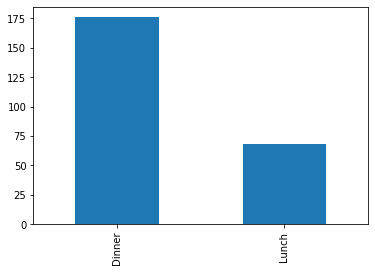

In [9]:
tips.time.value_counts().plot(kind='bar')                        

# Q: What is the proportion of Dinner & Lunches in %

In [10]:
tips.time.value_counts(normalize=True)

Dinner    0.721311
Lunch     0.278689
Name: time, dtype: float64

# Q: When does people give more tips (Lunch/Dinner)?

In [11]:
tips.groupby(['time'])['tip'].mean()

time
Lunch     2.728088
Dinner    3.102670
Name: tip, dtype: float64

# Q: Let's plot values


<AxesSubplot:xlabel='time'>

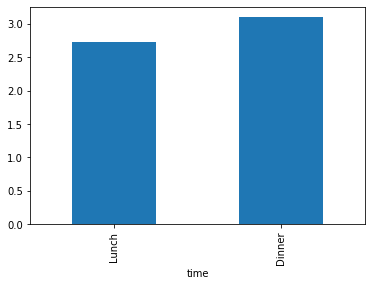

In [12]:
tips.groupby(['time'])['tip'].mean().plot.bar()

# CrossTable for smoker and tips

In [13]:
tips.groupby(['smoker', 'sex'])['tip'].mean()

smoker  sex   
Yes     Male      3.051167
        Female    2.931515
No      Male      3.113402
        Female    2.773519
Name: tip, dtype: float64

<AxesSubplot:xlabel='smoker'>

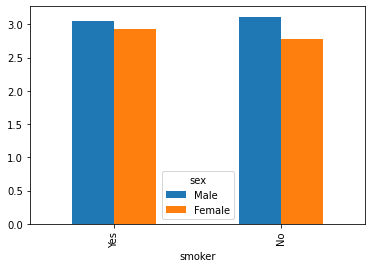

In [14]:
tips.groupby(['smoker', 'sex'])['tip'].mean().unstack().plot.bar()

In [23]:
tips.groupby(['day' ,'size'])['tip'].mean().unstack()

size,1,2,3,4,5,6
day,,,,,,
Thur,1.83,2.442500,2.692500,4.218000,5.000000,5.3
Fri,1.92,2.644375,3.000000,4.730000,NaN,NaN
Sat,1.00,2.517547,3.797778,4.123846,3.000000,NaN
Sun,NaN,2.816923,3.120667,4.087778,4.046667,5.0


# Creating a new column n to compare % of bill to total bill

In [29]:
tips['tips_percentage'] = tips.tip / tips.total_bill

In [40]:
tips.tips_percentage.value_counts()

0.144823    2
0.153846    2
0.101163    1
0.172194    1
0.103799    1
           ..
0.153492    1
0.218818    1
0.236746    1
0.141777    1
0.159744    1
Name: tips_percentage, Length: 242, dtype: int64

In [36]:
tips.groupby(['day', 'time'])['tip'].mean().unstack()

time,Lunch,Dinner
day,,
Thur,2.767705,3.000000
Fri,2.382857,2.940000
Sat,NaN,2.993103
Sun,NaN,3.255132


# Visualizing the relationship btw Total Bill and Tips (Using Pandas)

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

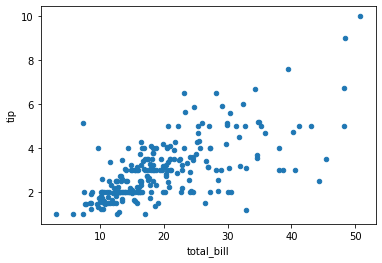

In [46]:
tips.plot.scatter(x='total_bill', y='tip')

# Visualizing the relationship btw Total Bill and Tips (Using Seaborn)

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

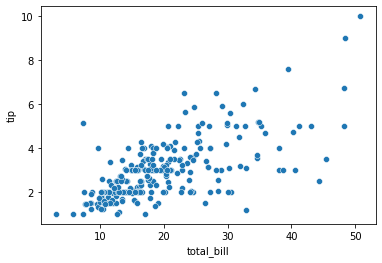

In [67]:
sns.scatterplot(x='total_bill', y='tip', data=tips)

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

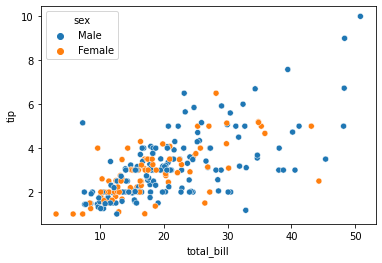

In [68]:
sns.scatterplot(x='total_bill', y='tip', data=tips, hue='sex')

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

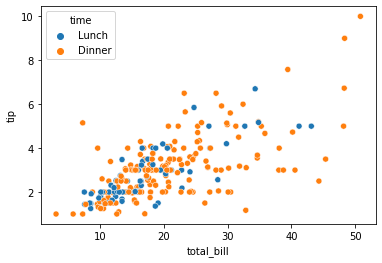

In [69]:
sns.scatterplot(x='total_bill', y='tip', data=tips, hue='time')

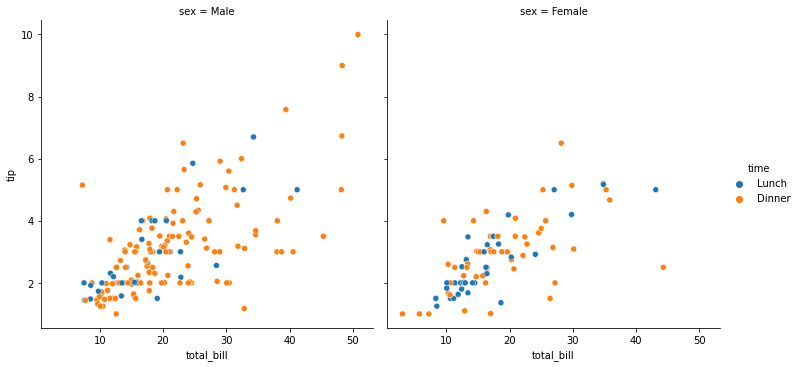

In [70]:
sns.relplot(x='total_bill', y='tip', data=tips, col='sex', hue='time')

# Visualization of distribution of Total Bill by Time

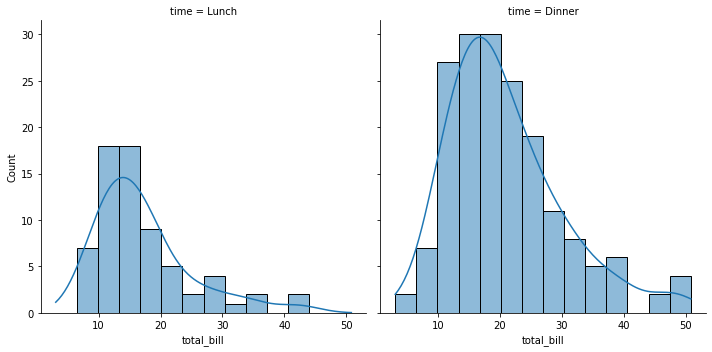

In [75]:
sns.displot( data=tips, x='total_bill',  col='time', kde=True)

In [77]:
# People pay more bill during Dinner 

# Visualization of distribution of Tip by Time

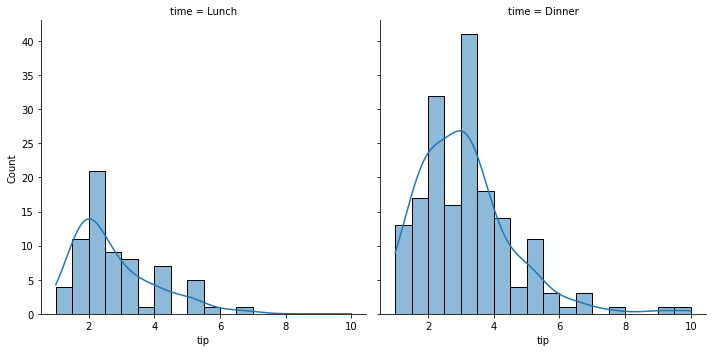

In [78]:
sns.displot(data=tips, x='tip', col='time', kde=True)

In [79]:
# people give more tip during Dinner

# Correlation of all numeric variables by sex 

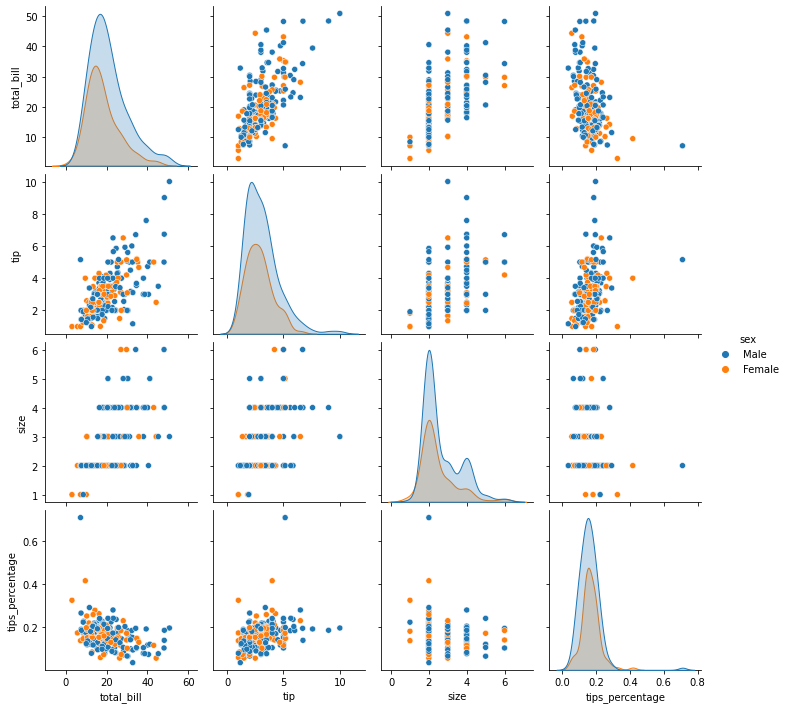

In [97]:
sns.pairplot(data=tips, hue='sex')

In [98]:
# del tips['tips_%age']